#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset=pd.read_csv(r"D:\Maastricht\Period 1\Data Mining\Notes and Exam paper\churn-train.csv")

#### Check the data and table  

In [2]:
#Data Table
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,61,No,'No phone service',DSL,Yes,No,Yes,No,No,No,Month-to-month,No,'Bank transfer (automatic)',33.60,2117.2,No
1,Male,0,Yes,Yes,72,Yes,Yes,'Fiber optic',No,Yes,Yes,Yes,No,No,'Two year',No,'Bank transfer (automatic)',90.45,6565.85,No
2,Female,0,No,No,5,Yes,Yes,'Fiber optic',No,No,No,No,Yes,No,Month-to-month,Yes,'Electronic check',84.00,424.75,No
3,Female,0,No,No,49,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,'Two year',No,'Bank transfer (automatic)',67.40,3306.85,No
4,Male,0,No,No,8,Yes,No,No,'No internet service','No internet service','No internet service','No internet service','No internet service','No internet service',Month-to-month,Yes,'Bank transfer (automatic)',19.70,168.9,No


In [3]:
#check the categorical and numerical features
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4695 entries, 0 to 4694
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4695 non-null   object 
 1   SeniorCitizen     4695 non-null   int64  
 2   Partner           4695 non-null   object 
 3   Dependents        4695 non-null   object 
 4   tenure            4695 non-null   int64  
 5   PhoneService      4695 non-null   object 
 6   MultipleLines     4695 non-null   object 
 7   InternetService   4695 non-null   object 
 8   OnlineSecurity    4695 non-null   object 
 9   OnlineBackup      4695 non-null   object 
 10  DeviceProtection  4695 non-null   object 
 11  TechSupport       4695 non-null   object 
 12  StreamingTV       4695 non-null   object 
 13  StreamingMovies   4695 non-null   object 
 14  Contract          4695 non-null   object 
 15  PaperlessBilling  4695 non-null   object 
 16  PaymentMethod     4695 non-null   object 


The info() represent the how many features/columns are present in the Table/data and also provide the information of each
feature data type.
The generally object data type are categorical feature And others  data type such as (Int 64 and float) 
are numerical feature.

<BarContainer object of 20 artists>

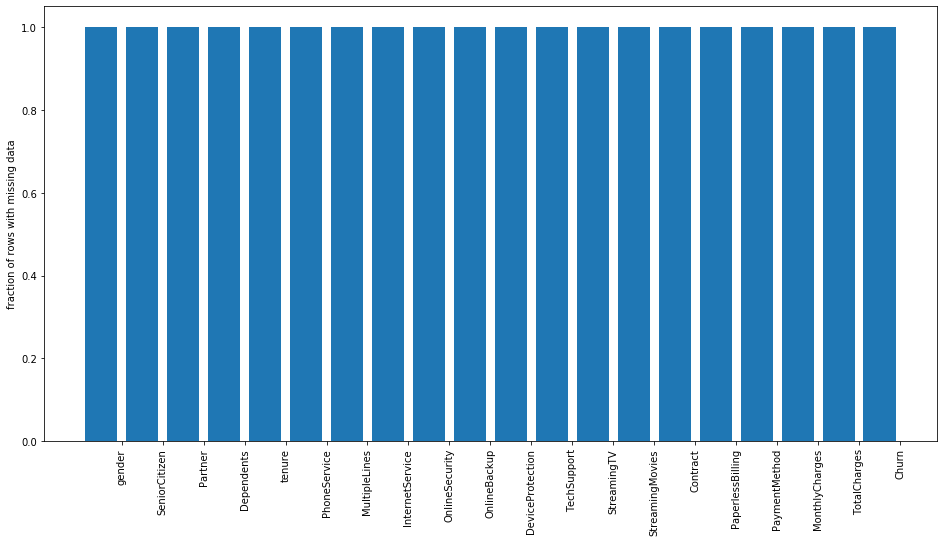

In [4]:
# Visualize all the features with checking the features values missing
null_counts=dataset.notnull().sum()/len(dataset)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

There is no missing values in the Dataset

In [5]:
Z=dataset.copy()
dataset["Churn"]=pd.Series(np.where(Z.Churn.values =="Yes",1,0),Z.index)

In [19]:
#convert the object into float64 data type (Numerical value)
dataset["TotalCharges"]=pd.to_numeric(dataset["TotalCharges"],errors='coerce')

In [20]:
y=dataset.iloc[:,-1:].values

In [21]:
#Separate the categorical feature and numerical features
cat_data=dataset.select_dtypes(include=['object']).copy()
##cat_data_update=cat_data.drop(columns='TotalCharges') # TotalCharges is a numerical feature but dtype is object
cat_data.head() 

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Male,Yes,Yes,No,'No phone service',DSL,Yes,No,Yes,No,No,No,Month-to-month,No,'Bank transfer (automatic)'
1,Male,Yes,Yes,Yes,Yes,'Fiber optic',No,Yes,Yes,Yes,No,No,'Two year',No,'Bank transfer (automatic)'
2,Female,No,No,Yes,Yes,'Fiber optic',No,No,No,No,Yes,No,Month-to-month,Yes,'Electronic check'
3,Female,No,No,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,'Two year',No,'Bank transfer (automatic)'
4,Male,No,No,Yes,No,No,'No internet service','No internet service','No internet service','No internet service','No internet service','No internet service',Month-to-month,Yes,'Bank transfer (automatic)'


In [23]:
#converting all the categorical feature into numerical using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
df_copy=cat_data.copy()
hot1=OneHotEncoder()
onehot_num= pd.get_dummies(df_copy)

In [24]:
onehot_num.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_'No phone service',MultipleLines_No,...,StreamingMovies_Yes,Contract_'One year',Contract_'Two year',Contract_Month-to-month,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_'Bank transfer (automatic)',PaymentMethod_'Credit card (automatic)',PaymentMethod_'Electronic check',PaymentMethod_'Mailed check'
0,0,1,0,1,0,1,1,0,1,0,...,0,0,0,1,1,0,1,0,0,0
1,0,1,0,1,0,1,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
2,1,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
3,1,0,1,0,1,0,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,1,1,0,1,0,0,1,0,1,...,0,0,0,1,0,1,1,0,0,0


In [25]:
onehot_num.corr()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_'No phone service',MultipleLines_No,...,StreamingMovies_Yes,Contract_'One year',Contract_'Two year',Contract_Month-to-month,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_'Bank transfer (automatic)',PaymentMethod_'Credit card (automatic)',PaymentMethod_'Electronic check',PaymentMethod_'Mailed check'
gender_Female,1.000000,-1.000000,-0.008519,0.008519,-0.002023,0.002023,-0.019209,0.019209,-0.019209,-0.004658,...,0.017777,-0.011366,0.012475,-0.001381,-0.005097,0.005097,0.007452,0.006933,-0.015121,0.002970
gender_Male,-1.000000,1.000000,0.008519,-0.008519,0.002023,-0.002023,0.019209,-0.019209,0.019209,0.004658,...,-0.017777,0.011366,-0.012475,0.001381,0.005097,-0.005097,-0.007452,-0.006933,0.015121,-0.002970
Partner_No,-0.008519,0.008519,1.000000,-1.000000,0.435701,-0.435701,0.016754,-0.016754,0.016754,0.132607,...,-0.117369,-0.089983,-0.259794,0.296392,-0.028538,0.028538,-0.107626,-0.075764,0.076742,0.091067
Partner_Yes,0.008519,-0.008519,-1.000000,1.000000,-0.435701,0.435701,-0.016754,0.016754,-0.016754,-0.132607,...,0.117369,0.089983,0.259794,-0.296392,0.028538,-0.028538,0.107626,0.075764,-0.076742,-0.091067
Dependents_No,-0.002023,0.002023,0.435701,-0.435701,1.000000,-1.000000,0.001149,-0.001149,0.001149,-0.030043,...,0.053639,-0.076893,-0.196181,0.231144,-0.118137,0.118137,-0.061385,-0.036040,0.140463,-0.062435
Dependents_Yes,0.002023,-0.002023,-0.435701,0.435701,-1.000000,1.000000,-0.001149,0.001149,-0.001149,0.030043,...,-0.053639,0.076893,0.196181,-0.231144,0.118137,-0.118137,0.061385,0.036040,-0.140463,0.062435
PhoneService_No,-0.019209,0.019209,0.016754,-0.016754,0.001149,-0.001149,1.000000,-1.000000,1.000000,-0.327591,...,0.027324,0.009028,-0.014068,0.004662,0.026872,-0.026872,-0.014694,0.013173,-0.009321,0.011789
PhoneService_Yes,0.019209,-0.019209,-0.016754,0.016754,-0.001149,0.001149,-1.000000,1.000000,-1.000000,0.327591,...,-0.027324,-0.009028,0.014068,-0.004662,-0.026872,0.026872,0.014694,-0.013173,0.009321,-0.011789
MultipleLines_'No phone service',-0.019209,0.019209,0.016754,-0.016754,0.001149,-0.001149,1.000000,-1.000000,1.000000,-0.327591,...,0.027324,0.009028,-0.014068,0.004662,0.026872,-0.026872,-0.014694,0.013173,-0.009321,0.011789
MultipleLines_No,-0.004658,0.004658,0.132607,-0.132607,-0.030043,0.030043,-0.327591,0.327591,-0.327591,1.000000,...,-0.276924,0.007765,-0.101257,0.080430,0.150789,-0.150789,-0.063037,-0.052868,-0.089103,0.210508


In [43]:
onehot_num.head()
X=onehot_num.iloc[:,:].values
onehot_num.shape


(4695, 41)

In [44]:
#Check the top 20features for the data set
from sklearn.feature_selection import SelectKBest, chi2
X_new=SelectKBest(chi2,k=20).fit_transform(X,y)
X_new=X_new.add()

(4695, 20)

In [47]:
# Imbalancing( So Accauracy to use confusion Matrix, precsion, recall and  F1 Score)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.tree import DecisionTreeClasifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

### Visualization of the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000250B67C95C8>,
      dtype=object)

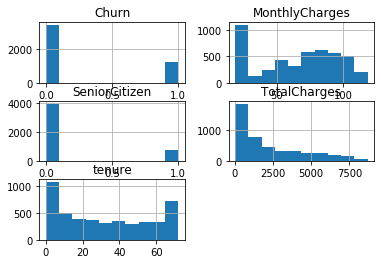

In [45]:
#visualize the numerical value
dataset.hist()

In [ ]:
Z=dataset.copy()
dataset["Churn"]=pd.Series(np.where(Z.Churn.values =="Yes",1,0),Z.index)

In [ ]:
onehot_num.head()

In [ ]:
dataset.hist(bins=20, color='steelblue', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
corr = dataset.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('turn Attributes Correlation Heatmap', fontsize=14)

In [ ]:
other_data=dataset.select_dtypes(include=['float64','int64']).copy()
other_data.head()


In [ ]:
sns.countplot(x='gender',data=dataset)
dataswt

In [ ]:
sns.countplot(x="Churn",data=dataset)

In [ ]:
sns.countplot(cat_data_update['InternetService'], data=dataset)

In [ ]:
sns.countplot(x='Partner',data=dataset)

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(),annot=True,linewidth=0.4)

In [ ]:
sns.catplot(x=dataset['Churn'],y=dataset['MonthlyCharges'], kind="bar",data=dataset)

In [ ]:
dataset['InternetService'].value_counts()

In [ ]:
dataset['Contract'].value_counts()

In [ ]:
sns.pairplot(dataset,hue="Churn", diag_kind="hist")

In [ ]:
onehot_num=onehot_num.drop(columns="Churn_No")

In [ ]:
onehot_num=onehot_num.drop(columns="Churn_Yes")

In [ ]:
Z=cat_data_update.copy()

In [ ]:
type(cat_data_update)

In [ ]:
cat_data_update['Churn']=pd.Series(np.where(Z.Churn.values =="Yes",1,0),Z.index)

In [ ]:
cat_data_update.head(20)

In [ ]:
sns.countplot(x="PaymentMethod", data=cat_data_update)

In [ ]:
sns.countplot(x="Churn", data=cat_data_update)

The Churn has high no value (0) compare to 1 value.This is imbalance the data so First balance the data for train the data


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
y=cat_data_update['Churn']
X=onehot_num


In [ ]:
X_new=SelectKBest(chi2, k=10).fit_transform(X,y)

In [ ]:
X_new.shape

In [ ]:
dataset.corr()

In [ ]:
X.corr()